In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor as dt
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np

In [2]:
z = pd.read_csv(r"C:\Users\skj_h\OneDrive\Desktop\boston_housing.csv")
z

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
z.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
z.shape

(506, 14)

In [5]:
z.size

7084

In [6]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
z.ndim

2

In [8]:
z.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [9]:
abs(z.corr()["MEDV"]).sort_values(ascending = False)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

<Axes: xlabel='LSTAT', ylabel='MEDV'>

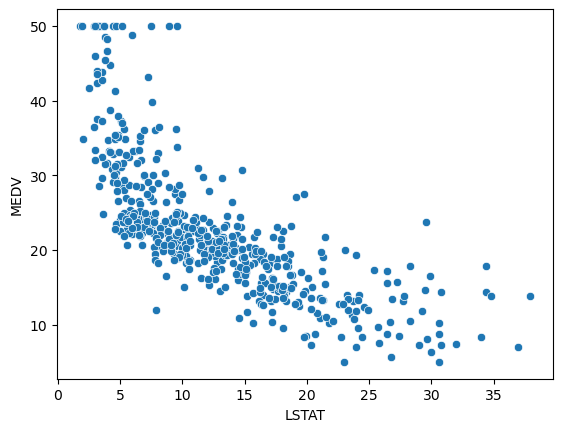

In [10]:
sns.scatterplot(x = z["LSTAT"], y = z["MEDV"], data = z)

In [ ]:
sns.pairplot(z)

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(z.corr(), annot = True, alpha = 1)

In [ ]:
z.columns

In [ ]:
sns.regplot(x = z["LSTAT"], y = z["MEDV"], data = z, line_kws = {"color" : "red"})

In [ ]:
z.columns

In [ ]:
x = z[["LSTAT", "MEDV"]]

In [ ]:
X = x
Y = x["MEDV"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
x_train.shape

In [ ]:
x_train = x_train.drop(["MEDV"], axis = 1)
x_test = x_test .drop(["MEDV"], axis = 1)

In [ ]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [ ]:
n = LinearRegression()
n.fit(x_train, y_train)

In [ ]:
y_predict_train = n.predict(x_train)
r2_train__LinearRegression = r2_score(y_true = y_train, y_pred = y_predict_train)

In [ ]:
n = LinearRegression()
n.fit(x_test, y_test)

In [ ]:
y_predict_test = n.predict(x_test)
r2_test__LinearRegression = r2_score(y_true = y_test, y_pred = y_predict_test)


In [ ]:
a = dt()
a.fit(x_train, y_train)

In [ ]:
y_predict_train1 = a.predict(x_train)
r2_train__DecisionTree = r2_score(y_true = y_train, y_pred = y_predict_train1)

In [ ]:
a = dt()
a.fit(x_test, y_test)

In [ ]:
y_predict_test1 = a.predict(x_test)
r2_test__DecisionTree = r2_score(y_true = y_test, y_pred = y_predict_test1)

In [ ]:
b = rf(n_estimators = 100)
b.fit(x_train, y_train)

In [ ]:
y_predict_train2 = b.predict(x_train)
r2_train__RandomForest = r2_score(y_true = y_train, y_pred = y_predict_train2)

In [ ]:
b = rf(n_estimators = 100)
b.fit(x_test, y_test)

In [ ]:
y_predict_test2 = b.predict(x_test)
r2_test__RandomForest = r2_score(y_true = y_test, y_pred = y_predict_test2)

In [ ]:
z5 = {"Model name" : ["LinearRegression", "Decision Tree Regression", "Random Forest Regression"],
      "Evaluation on training dataset" : [r2_train__LinearRegression, r2_train__DecisionTree,
                                          r2_train__RandomForest],
      "Evaluation on testing dataset" : [r2_test__LinearRegression, r2_test__DecisionTree,
                                          r2_test__RandomForest]
     }
      

In [ ]:
List_model_with_r2_score = pd.DataFrame(z5)
List_model_with_r2_score